In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.title_fontsize'] = 12

In [3]:
def plot_distribution(df, feature, filename):
    
    labels = np.unique(df[feature])
    a = len(labels)
    
    c = a % 3 
    if c == 0:
        b = a // 3
    else:
        b = a // 3 + 1
    
    height = 4 * b
    
    fig, axes = plt.subplots(b, 3, figsize = (15, height), tight_layout = True)

    for i in range(len(labels)):
    
        row = i // 3
        col = i % 3
        df_label = df[df[feature] == labels[i]].copy()
        sns.histplot(data = df_label, x = 'km_label', hue = feature, stat = 'probability', discrete = True,
                     common_norm = False, element = 'bars', palette = 'Paired', ax = axes[row, col])
        
        axes[row, col].set_xlim(0, 5)
        axes[row, col].set_xticks([0, 1, 2, 3, 4, 5], format = '%.0f')
        axes[row, col].set_xlabel('Clusters')
        axes[row, col].set_ylim(0, 1.1)
        axes[row, col].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], format = '%.1f')
        
    plt.savefig('./{}_Distribution_{}.png'.format(filename, feature))

In [4]:
def cal_probs(df):
    
    feature = np.unique(df['Locations'])
    probs = pd.DataFrame()
    
    for i in range(len(feature)):
        
        df_probs = df[df['Locations'] == feature[i]]
        rating_probs = df_probs.groupby('km_label').size().div(len(df_probs))
        rating_probs = pd.DataFrame(rating_probs, columns = ['{}'.format(feature[i])])
        probs = pd.concat([probs, rating_probs], axis = 1)
        
    probs = probs.fillna(0)
    return probs

In [5]:
def plot_km(df, Serp, color):
    
    feature = df.columns
    category = ['Cluster '+Serp+str(i+1) for i in range(4)]
    
    df = df.swapaxes('index', 'columns')
    data = df.to_numpy()
    data_cum = data.cumsum(axis = 1)
    
    category_c = plt.colormaps[color](np.linspace(0.15, 1, data.shape[1])) #RdYlGn
    
    fig, ax = plt.subplots(figsize=(5, 5), dpi = 300)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category, category_c)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(feature, widths, left=starts, height=0.7,
                        label=colname, color=color)

#         r, g, b, _ = color
#         text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
#         ax.bar_label(rects, label_type='center', color=text_color, fmt = '%.2f')
    
    ax.legend(ncol=len(category), bbox_to_anchor=(0, 1), loc='lower left', fontsize = 7.3)
    
    return ax, fig

### Low Temperature Serpentine

In [6]:
df_L_Srp = pd.read_excel('Ophiolite.xlsx', sheet_name = 'L_Srp_km')

In [7]:
# df_L_Srp = df_L_Srp.drop(df_L_Srp[(df_L_Srp['Locations'] == 'Chile') |
#                                (df_L_Srp['Locations'] == 'IOR') |
#                                (df_L_Srp['Locations'] == 'Japan') |
#                                (df_L_Srp['Locations'] == 'MAR') |
#                                (df_L_Srp['Locations'] == 'Cuba') |
#                                (df_L_Srp['Locations'] == 'Qinling, China') |
#                                (df_L_Srp['Locations'] == 'Hess Deep')].index)

In [8]:
df_L_Srp.Locations.value_counts()

Quebec, Canada    84
New Caledonia     75
Central Greece    62
NE, Corsica       58
South Italy       51
NW, Iran          39
IBM               23
BC, Canada        20
ED, Egypt         20
NQO, Tibet        19
Elba Island       18
Alps              17
Guatemala         16
IOR                8
MAR                7
Japan              6
Qinling, China     6
Cuba               2
Chile              2
Hess Deep          1
Name: Locations, dtype: int64

In [9]:
# plt.figure(figsize = (12, 9), dpi = 200, tight_layout = True)

# sns.histplot(data = df_L_Srp, x = 'km_label', y = 'Locations', stat = 'density', discrete = True,
#                      common_norm = True, element = 'bars', legend = False)

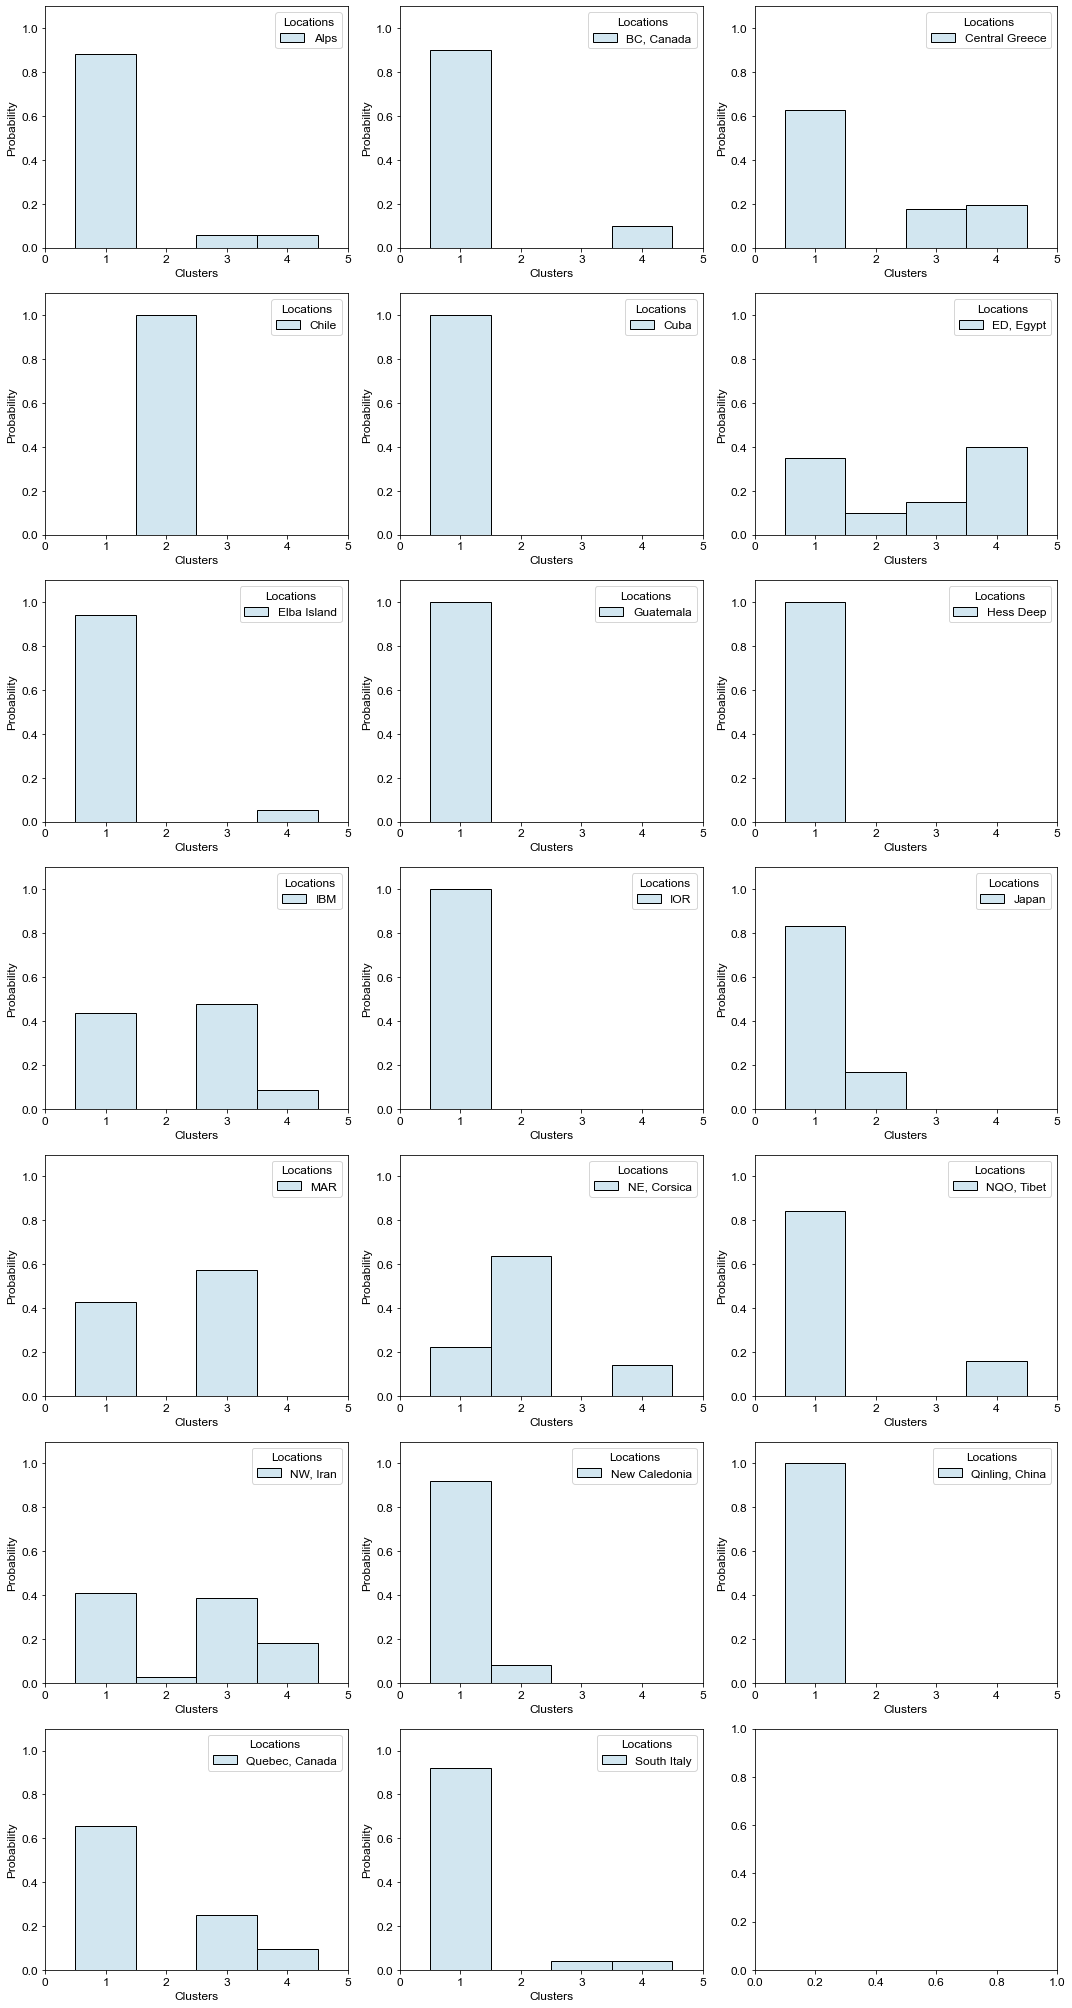

In [10]:
plot_distribution(df_L_Srp, 'Locations', 'L_Srp')

In [11]:
probs_L_Srp = cal_probs(df_L_Srp)
probs_L_Srp

,Alps,"BC, Canada",Central Greece,Chile,Cuba,"ED, Egypt",Elba Island,Guatemala,Hess Deep,IBM,IOR,Japan,MAR,"NE, Corsica","NQO, Tibet","NW, Iran",New Caledonia,"Qinling, China","Quebec, Canada",South Italy
km_label,,,,,,,,,,,,,,,,,,,,
1,0.882353,0.9,0.629032,0.0,1.0,0.35,0.944444,1.0,1.0,0.434783,1.0,0.833333,0.428571,0.224138,0.842105,0.410256,0.92,1.0,0.654762,0.921569
2,0.000000,0.0,0.000000,1.0,0.0,0.10,0.000000,0.0,0.0,0.000000,0.0,0.166667,0.000000,0.637931,0.000000,0.025641,0.08,0.0,0.000000,0.000000
3,0.058824,0.0,0.177419,0.0,0.0,0.15,0.000000,0.0,0.0,0.478261,0.0,0.000000,0.571429,0.000000,0.000000,0.384615,0.00,0.0,0.250000,0.039216
4,0.058824,0.1,0.193548,0.0,0.0,0.40,0.055556,0.0,0.0,0.086957,0.0,0.000000,0.000000,0.137931,0.157895,0.179487,0.00,0.0,0.095238,0.039216


In [12]:
L_Srp = probs_L_Srp.drop(columns = ['Chile', 'Japan', 'MAR', 'Cuba', 'Qinling, China', 'Hess Deep', 'IOR'])

In [13]:
L_Srp

,Alps,"BC, Canada",Central Greece,"ED, Egypt",Elba Island,Guatemala,IBM,"NE, Corsica","NQO, Tibet","NW, Iran",New Caledonia,"Quebec, Canada",South Italy
km_label,,,,,,,,,,,,,
1,0.882353,0.9,0.629032,0.35,0.944444,1.0,0.434783,0.224138,0.842105,0.410256,0.92,0.654762,0.921569
2,0.000000,0.0,0.000000,0.10,0.000000,0.0,0.000000,0.637931,0.000000,0.025641,0.08,0.000000,0.000000
3,0.058824,0.0,0.177419,0.15,0.000000,0.0,0.478261,0.000000,0.000000,0.384615,0.00,0.250000,0.039216
4,0.058824,0.1,0.193548,0.40,0.055556,0.0,0.086957,0.137931,0.157895,0.179487,0.00,0.095238,0.039216


In [14]:
labels = L_Srp.index
df_1 = L_Srp.sort_values(by = labels[0], axis = 1, ascending = False)
df_1

,Guatemala,Elba Island,South Italy,New Caledonia,"BC, Canada",Alps,"NQO, Tibet","Quebec, Canada",Central Greece,IBM,"NW, Iran","ED, Egypt","NE, Corsica"
km_label,,,,,,,,,,,,,
1,1.0,0.944444,0.921569,0.92,0.9,0.882353,0.842105,0.654762,0.629032,0.434783,0.410256,0.35,0.224138
2,0.0,0.000000,0.000000,0.08,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.10,0.637931
3,0.0,0.000000,0.039216,0.00,0.0,0.058824,0.000000,0.250000,0.177419,0.478261,0.384615,0.15,0.000000
4,0.0,0.055556,0.039216,0.00,0.1,0.058824,0.157895,0.095238,0.193548,0.086957,0.179487,0.40,0.137931


(<AxesSubplot:>, <Figure size 1500x1500 with 1 Axes>)

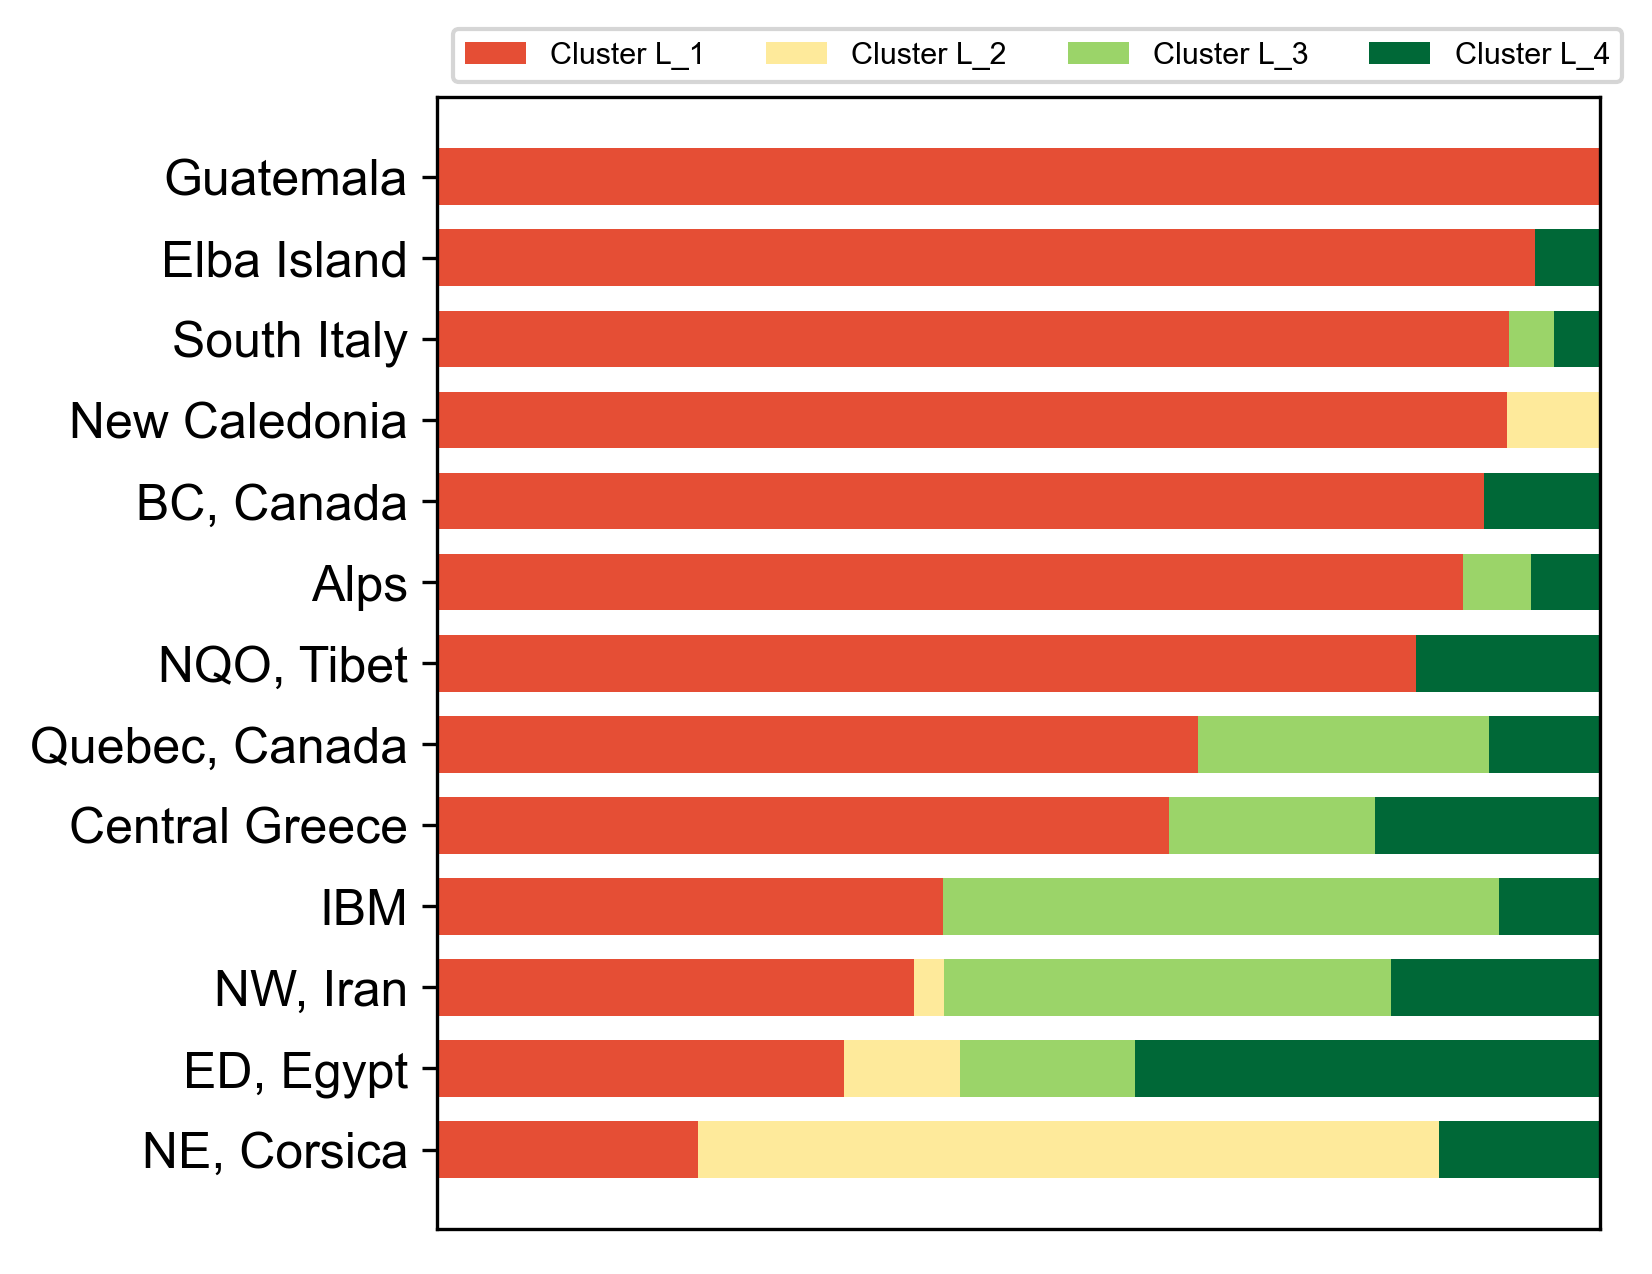

In [15]:
plot_km(df_1, 'L_', 'RdYlGn')
# plt.savefig('./Cluster_L_Srp.png')

In [16]:
L_left = probs_L_Srp[['Chile', 'Japan', 'MAR', 'Cuba', 'Qinling, China', 'Hess Deep']].copy()

In [17]:
L_left

,Chile,Japan,MAR,Cuba,"Qinling, China",Hess Deep
km_label,,,,,,
1,0.0,0.833333,0.428571,1.0,1.0,1.0
2,1.0,0.166667,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.571429,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0


(<AxesSubplot:>, <Figure size 1500x1500 with 1 Axes>)

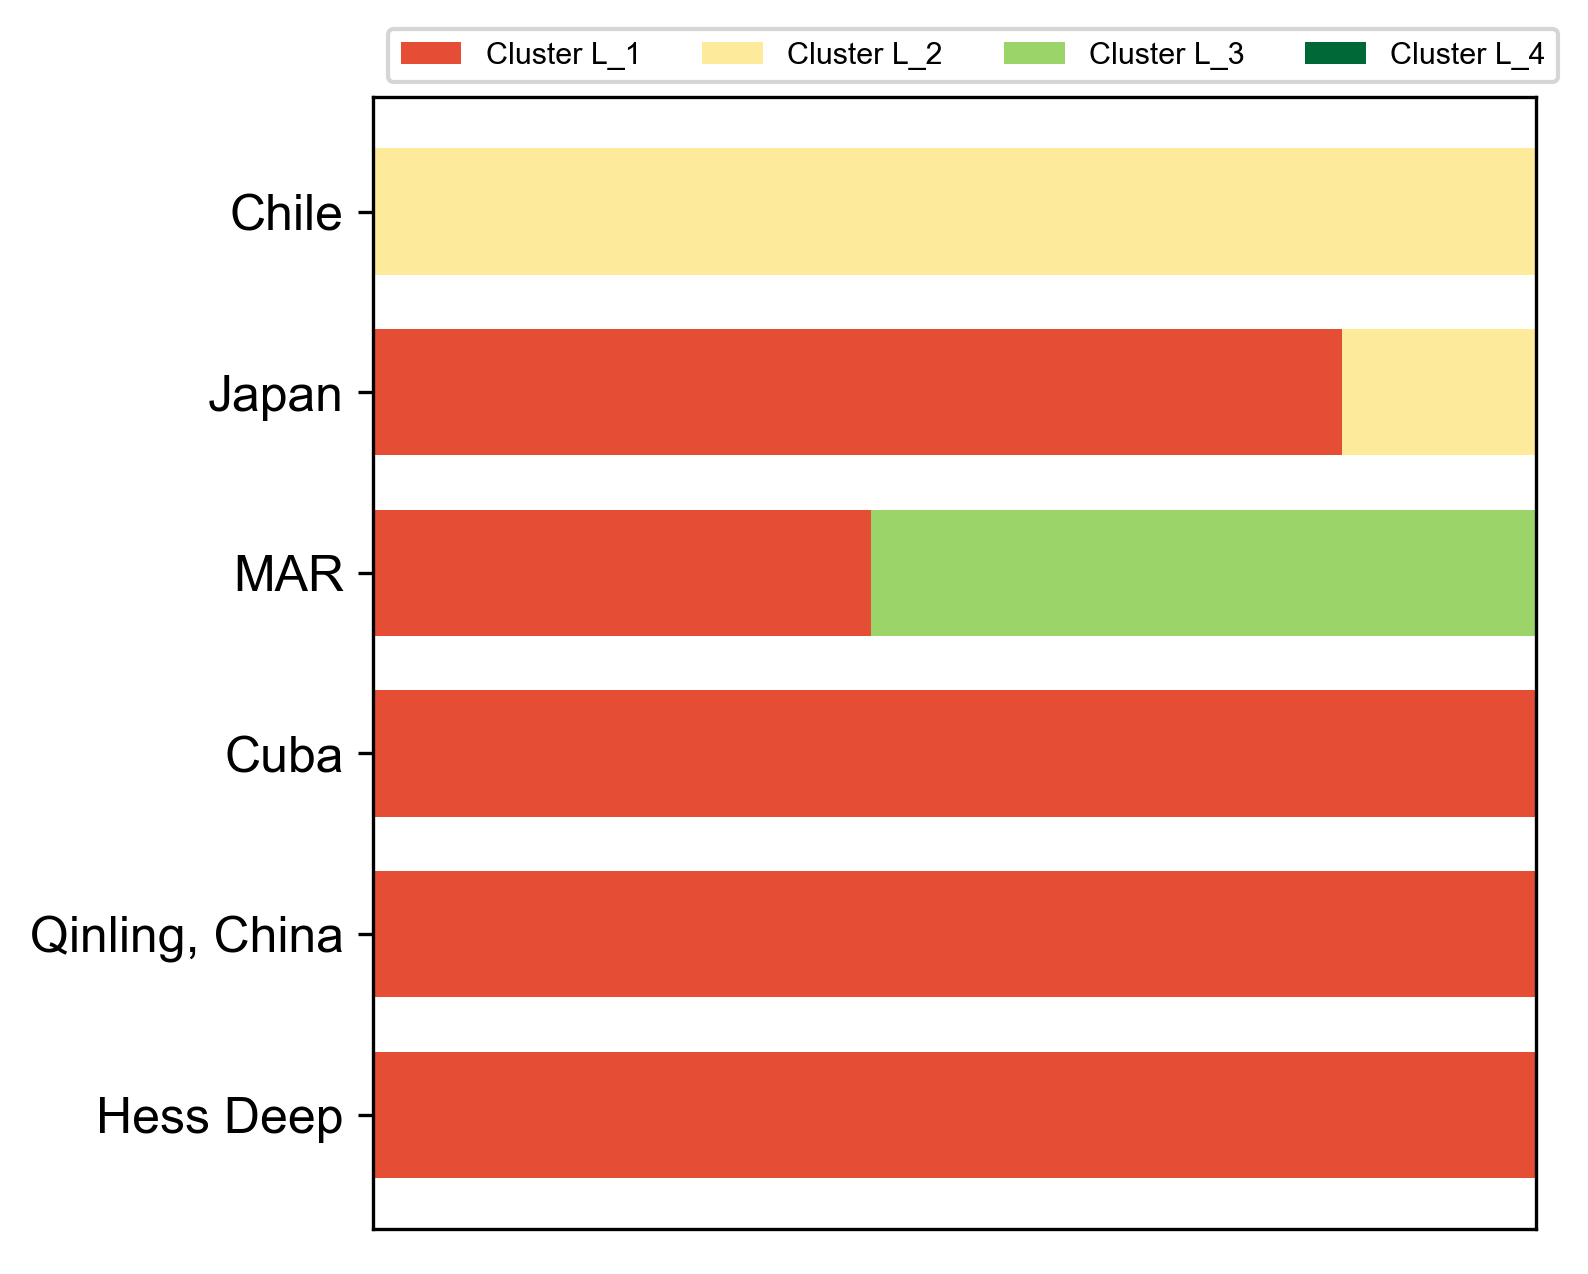

In [18]:
plot_km(L_left, 'L_', 'RdYlGn')

### High Temperature Serpentine

In [19]:
df_H_Srp = pd.read_excel('Ophiolite.xlsx', sheet_name = 'H_Srp_km')

In [20]:
df_H_Srp.Locations.value_counts()

Alps              374
Central Greece    112
New Caledonia      51
Hess Deep          40
ED, Egypt          39
NE, Corsica        35
MAR                33
NW, Iran           24
Quebec, Canada     20
IOR                20
NQO, Tibet         18
Qinling, China     18
Cuba               16
Japan              15
Chile              11
Guatemala           9
IBM                 6
Name: Locations, dtype: int64

In [21]:
df_H_Srp = df_H_Srp.drop(df_H_Srp[(df_H_Srp['Locations'] == 'Guatemala') | 
                                  (df_H_Srp['Locations'] == 'IBM')].index)

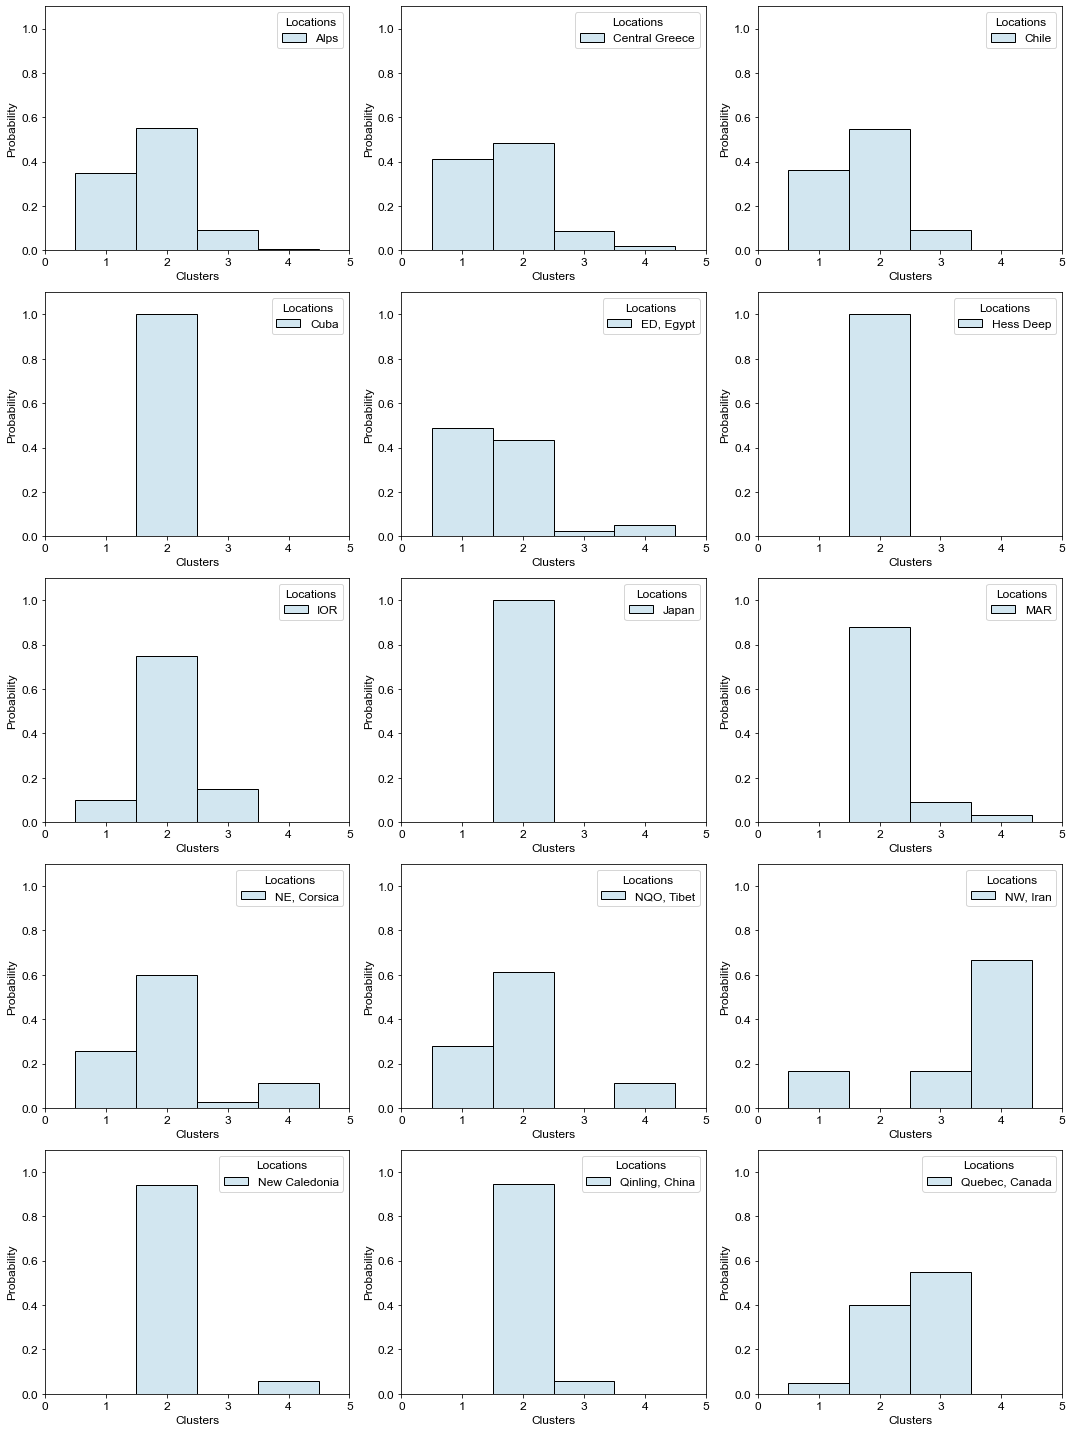

In [22]:
plot_distribution(df_H_Srp, 'Locations', 'H_Srp')

In [23]:
probs_H_Srp = cal_probs(df_H_Srp)
probs_H_Srp

,Alps,Central Greece,Chile,Cuba,"ED, Egypt",Hess Deep,IOR,Japan,MAR,"NE, Corsica","NQO, Tibet","NW, Iran",New Caledonia,"Qinling, China","Quebec, Canada"
km_label,,,,,,,,,,,,,,,
1,0.347594,0.410714,0.363636,0.0,0.487179,0.0,0.10,0.0,0.000000,0.257143,0.277778,0.166667,0.000000,0.000000,0.05
2,0.553476,0.482143,0.545455,1.0,0.435897,1.0,0.75,1.0,0.878788,0.600000,0.611111,0.000000,0.941176,0.944444,0.40
3,0.093583,0.089286,0.090909,0.0,0.025641,0.0,0.15,0.0,0.090909,0.028571,0.000000,0.166667,0.000000,0.055556,0.55
4,0.005348,0.017857,0.000000,0.0,0.051282,0.0,0.00,0.0,0.030303,0.114286,0.111111,0.666667,0.058824,0.000000,0.00


In [24]:
index = probs_H_Srp.index
df_2 = probs_H_Srp.sort_values(by = index[1], axis = 1, ascending = False)
df_2

,Cuba,Hess Deep,Japan,"Qinling, China",New Caledonia,MAR,IOR,"NQO, Tibet","NE, Corsica",Alps,Chile,Central Greece,"ED, Egypt","Quebec, Canada","NW, Iran"
km_label,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.10,0.277778,0.257143,0.347594,0.363636,0.410714,0.487179,0.05,0.166667
2,1.0,1.0,1.0,0.944444,0.941176,0.878788,0.75,0.611111,0.600000,0.553476,0.545455,0.482143,0.435897,0.40,0.000000
3,0.0,0.0,0.0,0.055556,0.000000,0.090909,0.15,0.000000,0.028571,0.093583,0.090909,0.089286,0.025641,0.55,0.166667
4,0.0,0.0,0.0,0.000000,0.058824,0.030303,0.00,0.111111,0.114286,0.005348,0.000000,0.017857,0.051282,0.00,0.666667


(<AxesSubplot:>, <Figure size 1500x1500 with 1 Axes>)

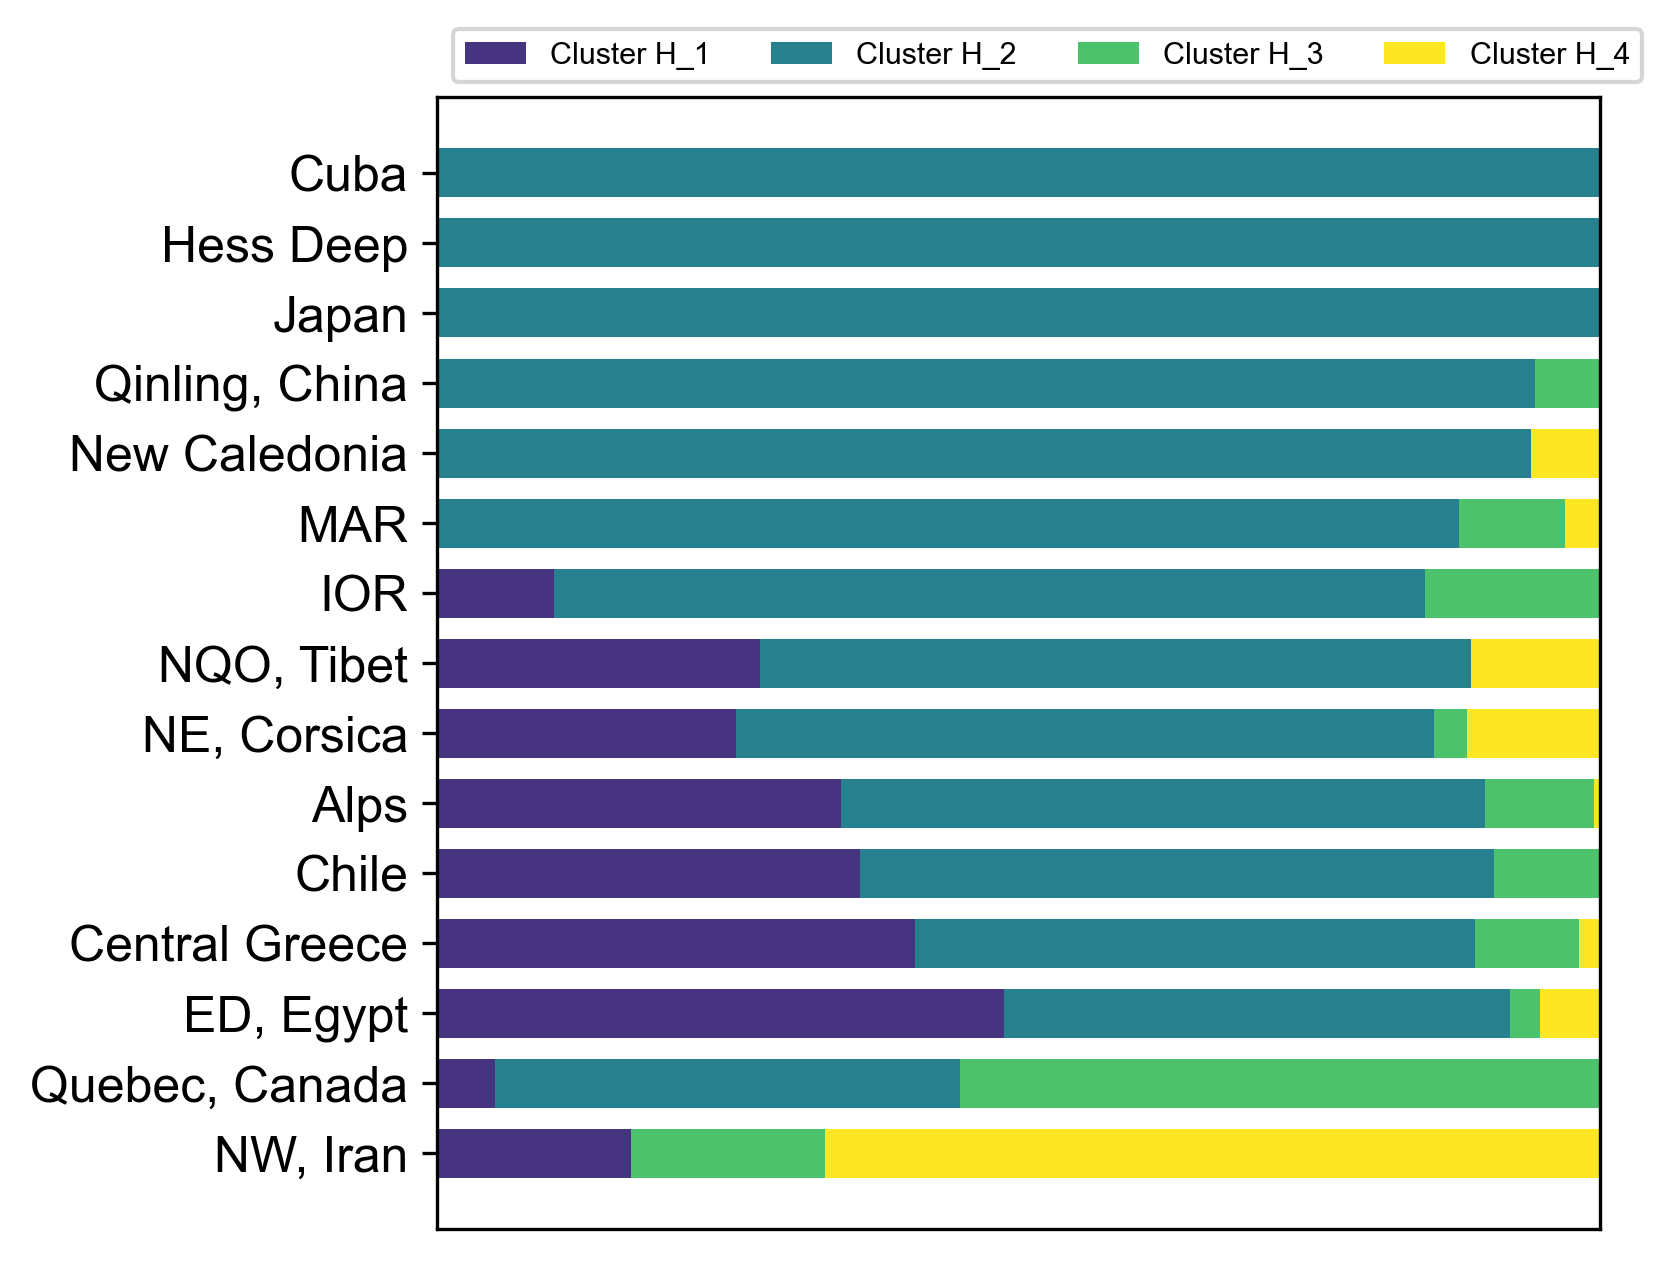

In [25]:
plot_km(df_2, 'H_', 'viridis')
# plt.savefig('./Cluster_H_Srp.png')

### Distribution 

In [26]:
df = pd.read_excel('Ophiolite.xlsx', sheet_name = 'Data_knn')

In [27]:
elements = [
            'SiO2(wt.%)', 
            'TiO2(wt.%)', 
            'Al2O3(wt.%)',
            'Cr2O3(wt.%)', 
            'FeOtot(wt.%)', 
            'MnO(wt.%)', 
            'NiO(wt.%)', 
            'MgO(wt.%)'
           ]

In [28]:
labels = [
    '$\mathregular{SiO_2(wt.\%)}$',
    '$\mathregular{TiO_2(wt.\%)}$',
    '$\mathregular{Al_2O_3(wt.\%)}$',
    '$\mathregular{Cr_2O_3(wt.\%)}$',
    '$\mathregular{FeO_{tot}(wt.\%)}$',
    '$\mathregular{MnO(wt.\%)}$',
    '$\mathregular{NiO(wt.\%)}$',
    '$\mathregular{MgO(wt.\%)}$'
]
title = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']

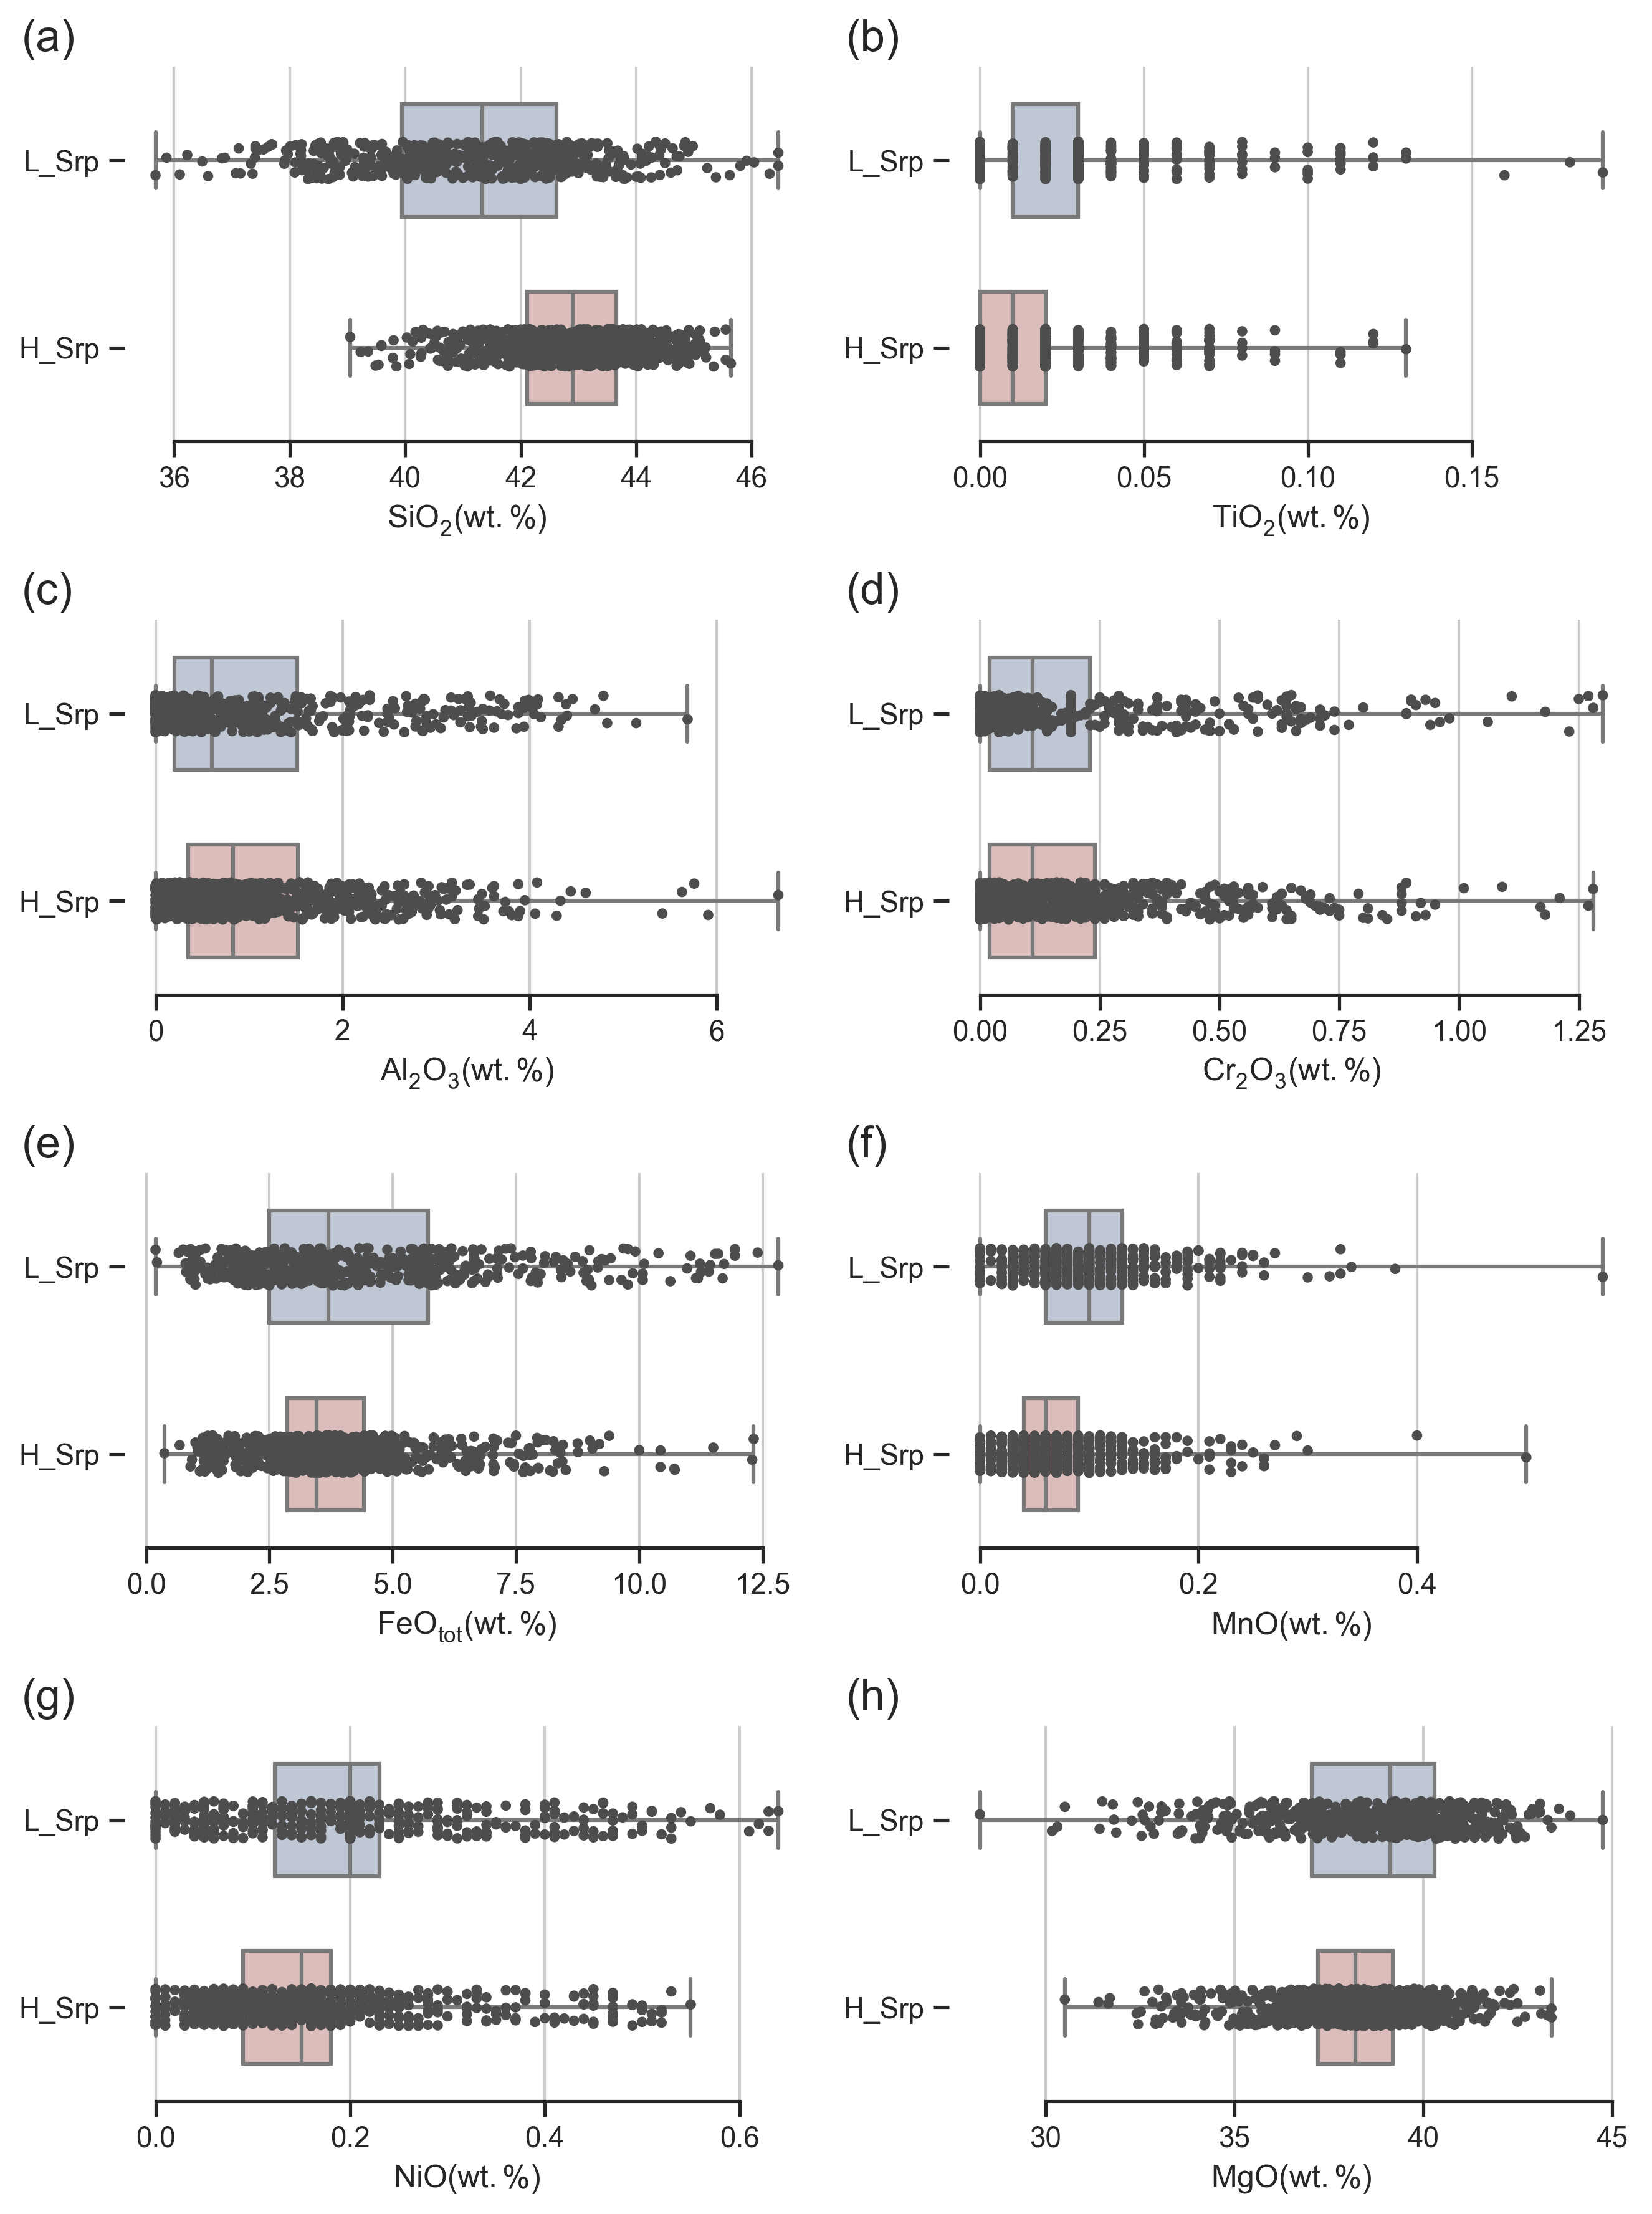

In [29]:
sns.set_theme(style="ticks")

fig, axes = plt.subplots(4, 2, figsize = (9, 12), dpi = 300, tight_layout = True)

for i in range(len(elements)):
    
#     labels = np.unique(df[elements])
    row = i // 2
    col = i % 2
#     df_label = df[df[feature] == labels[i]].copy()
    sns.boxplot(x=elements[i], y='Mineralogy', data=df, whis=[0, 100], 
                width=.6, palette="vlag", ax = axes[row, col])

    sns.stripplot(x=elements[i], y='Mineralogy', data=df, size=4, 
                  color=".3", linewidth=0, ax = axes[row, col])
        
    axes[row, col].xaxis.grid(True)
    axes[row, col].set(ylabel="")
    axes[row, col].set(xlabel = labels[i])
    axes[row, col].set_title(title[i], loc = 'left', fontsize = 17, x = -0.15)
    sns.despine(trim=True, left=True, ax = axes[row, col])
    
plt.savefig('./element_distribution.png')

### 3D plot

In [30]:
import re, seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [31]:
def plot_3d(df, title, location):
    x = df['PC1']
    y = df['PC2']
    z = df['PC3']

    c = df['km_label']

    cmap = ListedColormap(sns.color_palette("Paired", 256).as_hex())

    sc = ax.scatter(x, y, z, s=50, c=c, marker='o', edgecolor='w', cmap=cmap, alpha=1)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(title, pad = 0, loc = 'left', y = 0.95)

    plt.legend(*sc.legend_elements(), bbox_to_anchor=location, loc=2)

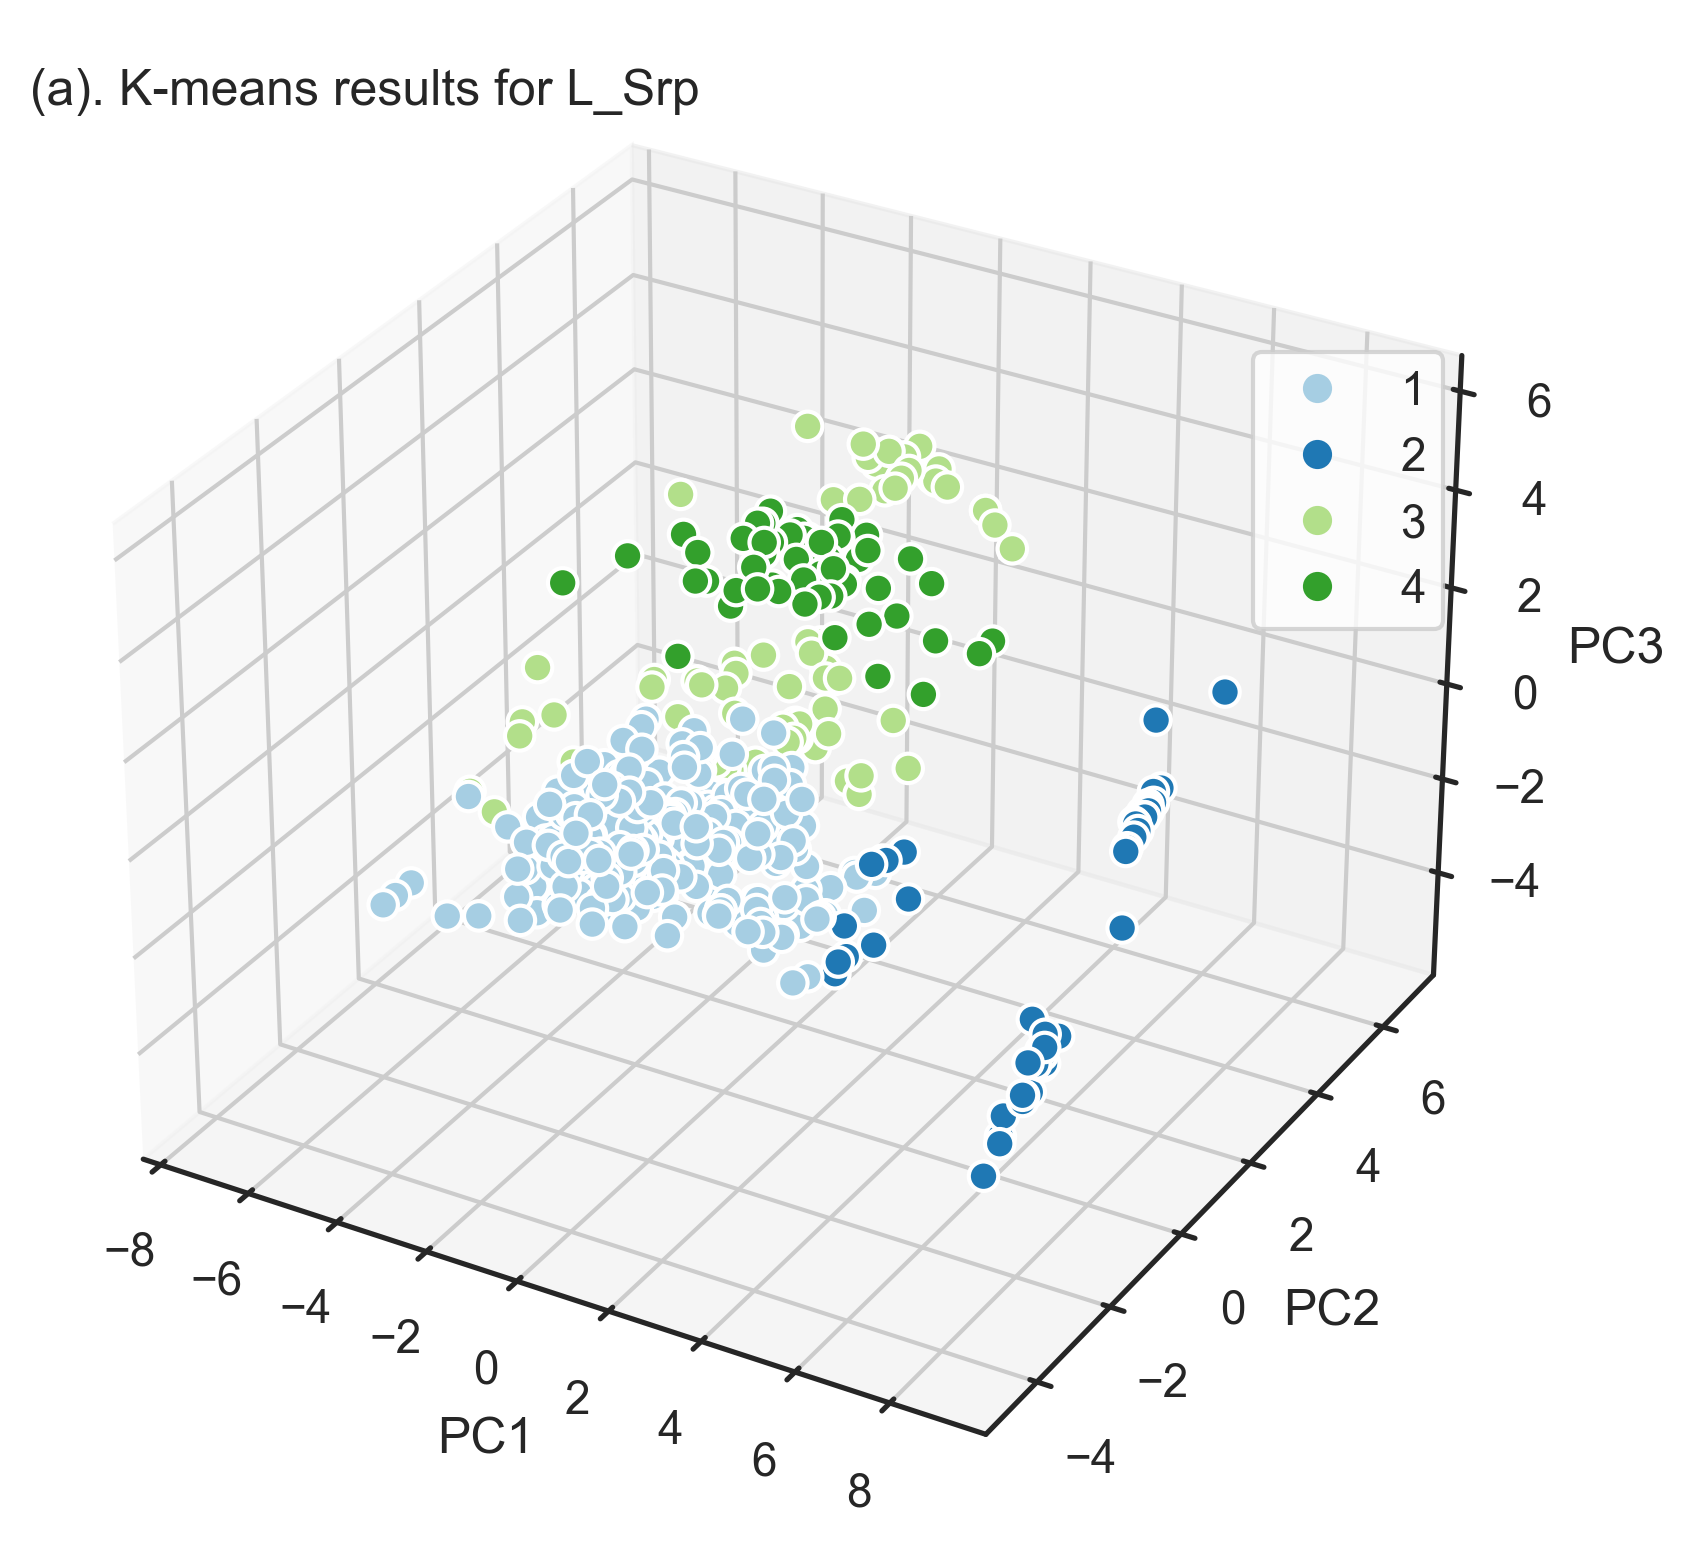

In [32]:
fig = plt.figure(figsize=(5,5), dpi = 300)
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
plot_3d(df_L_Srp, '(a). K-means results for L_Srp', (0.8, 0.8))
plt.savefig('./3D_L_Srp.png')

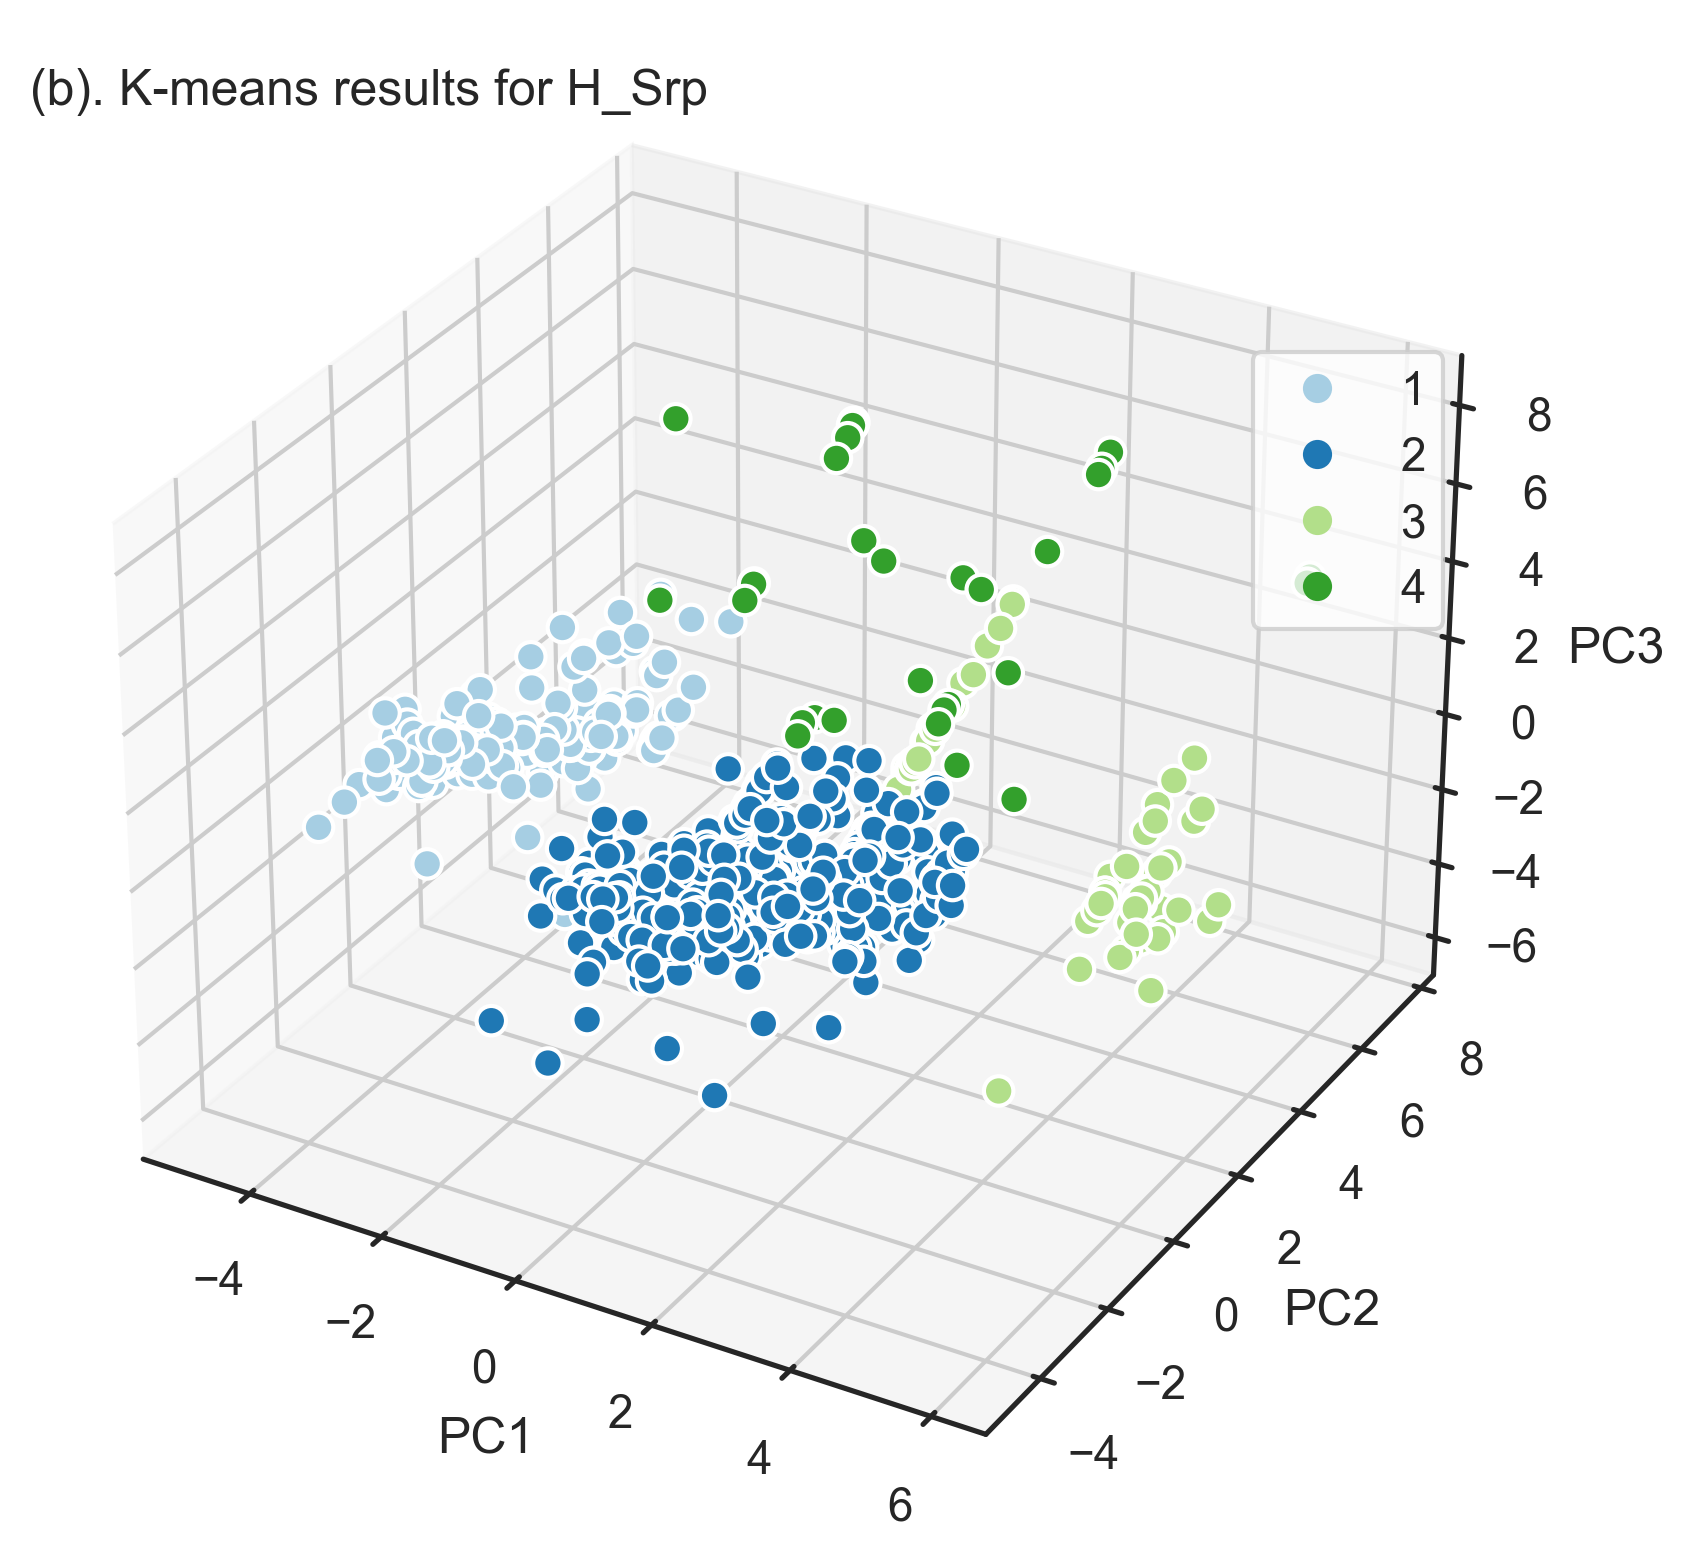

In [33]:
fig = plt.figure(figsize=(5,5), dpi = 300)
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
plot_3d(df_H_Srp, '(b). K-means results for H_Srp', (0.8, 0.8))
plt.savefig('./3D_H_Srp.png')